# Clustering

Graduate Specialization Program: Data Science & Artificial Intelligence
- Subject: *Introduction, Definition & Examples*
- Class: CDAIA001
- Lessons: 03 and 04 (06–07/06/2025)

## Setup

### Requirements

In [ ]:
%pip install --upgrade pip
%pip install -r ../requirements.txt

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Read Dataset

In [3]:
df = pd.read_json(path_or_buf='../datasets/films.json')
df.head()

,person,month,film,rating,genre
0,John,1,The Shawshank Redemption,9.3,Drama
1,John,1,Inception,8.8,Action
2,John,1,Parasite,8.5,Thriller
3,Jane,1,La La Land,8.0,Romance
4,Jane,1,The Godfather,9.2,Crime


## Clustering 01

Using `TfidfVectorizer` and `KMeans` to create **film genre** clusters.

In [26]:
film_genres = df['genre'].tolist()

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(film_genres)

n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
kmeans.fit(X)

clusters = kmeans.labels_

for i in range(n_clusters):
    print(f'Cluster #{i}:')
    for text, cluster in zip(film_genres, clusters):
        if cluster == i:
            print(f' - {text}')
    print('\n')

Cluster #0:
 - Drama
 - Drama
 - Drama
 - Drama
 - Drama
 - Drama
 - Drama
 - Drama
 - Drama
 - Drama
 - Drama
 - Drama
 - Drama


Cluster #1:
 - Romance
 - Romance
 - Romance
 - Romance
 - Romance
 - Romance
 - Romance
 - Romance


Cluster #2:
 - Sci-Fi
 - Sci-Fi
 - Sci-Fi
 - Mystery
 - Western
 - Adventure
 - Sci-Fi
 - War


Cluster #3:
 - Crime
 - Crime
 - Crime
 - Crime
 - Crime


Cluster #4:
 - Action
 - Action
 - Action
 - Action


Cluster #5:
 - Thriller
 - Thriller
 - Thriller
 - Thriller


Cluster #6:
 - Biography
 - Biography
 - Biography


Cluster #7:
 - Comedy
 - Comedy


Cluster #8:
 - Animation
 - Animation


Cluster #9:
 - Fantasy




### Plot Clusters

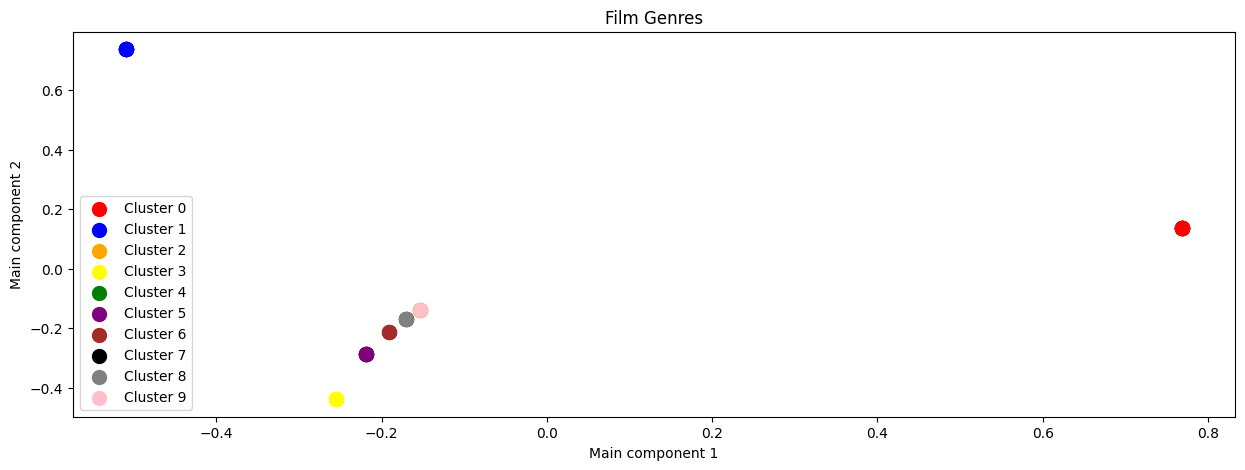

In [27]:
pca = PCA(n_components=10)
reduced_data = pca.fit_transform(X.toarray())

plt.figure(figsize=(15, 5))
colors = ['red', 'blue', 'orange', 'yellow', 'green', 'purple', 'brown', 'black', 'gray', 'pink']

for i in range(n_clusters):
    points = reduced_data[clusters == i]
    plt.scatter(points[:, 0], points[:, 1], s=100, c=colors[i], label=f"Cluster {i}")

plt.title("Film Genres")
plt.xlabel("Main component 1")
plt.ylabel("Main component 2")
plt.legend()
plt.show()

## Clustering 02

Occurrence of months where films were watched.

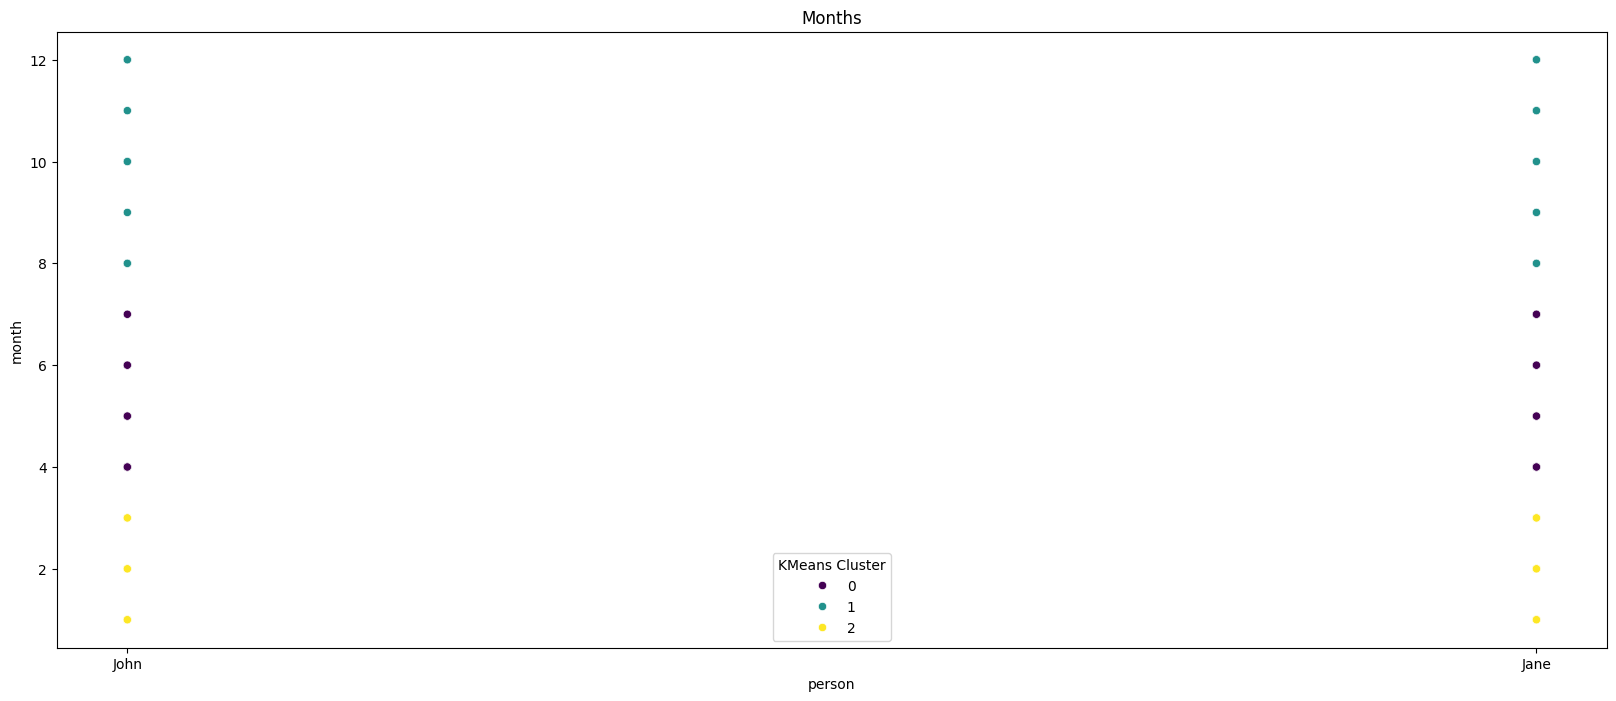

In [29]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['month']])

kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans Cluster'] = kmeans.fit_predict(scaled_data)

fig, ax = plt.subplots(figsize=(20, 8))

sns.scatterplot(data=df, x='person', y='month', hue='KMeans Cluster', ax=ax, palette='viridis')
ax.set_title('Months')

plt.show()